In [55]:
from cond_sky_dataset import SkyDataset
import imageio
import os

In [56]:
dataset = SkyDataset()

In [57]:
image_path_list = dataset._get_image_paths()
image_path_dict = dataset._image_paths_to_dict(image_path_list)
image_seq_splitted_dict = dataset._split_lists(image_path_dict)
image_seq_splitted_list = dataset._get_lists(image_seq_splitted_dict)

In [59]:
gif_len = 20
step = 10
res_list = []
for sequence in image_seq_splitted_list:
    for i in range(gif_len, len(sequence) - (len(sequence) % step), step):
        res_list.append(sequence[i - gif_len:i])
len(res_list)

1707

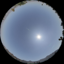

In [71]:
from PIL import Image
img = Image.open(image_seq_splitted_list[0][0])
img = img.resize((128, 64))
img

In [74]:
def create_gif(image_paths, gif_path, duration=100, size=128):
    image_list = [Image.open(file).resize((size, size)) for file in image_paths]

    image_list[0].save(
            gif_path,
            save_all=True,
            append_images=image_list[1:], # append rest of the images
            duration=100, # in milliseconds
            loop=1)
    
for i, image_paths in enumerate(res_list):
    create_gif(image_paths, f"/home/s_gladkykh/thesis/gif_dataset_64/{str(i).zfill(4)}.gif", 100, 64)  